# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberta a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno</b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-success">

<b>Comentário geral: </b> <a class="tocSkip"></a>


Parabéns pela conclusão do projeto, João Pedro! 🎉 Seu projeto está com uma qualidade excelente! 



Parabéns, o projeto está aprovado!


</div>

# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você trabalha neste projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de começar a análise dos dados, explique com suas próprias palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

## Inicialização

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

## Carregue os dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Os dados foram carregados corretamente.
</div>

## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

## Planos

In [3]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprima uma amostra de dados dos planos
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Ao analisar o DataFrame `plans` pude perceber que temos apenas 2 planos disponíveis, o plano `surf` e o plano `ultimate`. Um problema encontrado foi o nome da coluna `'usd_monthly_pay'`, que segundo o dicionário de dados deveria se chamar `'usd_monthly_fee'`. Além disso, vou converter as colunas `'usd_monthly_pay'` e `'usd_per_gb'` para float, apenas para manter o padrão de colunas com valor monetário em float.

## Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [5]:
plans = plans.rename(columns={
    'usd_monthly_pay':'usd_monthly_fee'
})

In [6]:
plans['usd_monthly_fee'] = plans['usd_monthly_fee'].astype('float')
plans['usd_per_gb'] = plans['usd_per_gb'].astype('float')

In [7]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate


## Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

Posso criar uma nova coluna baseada em `'mb_per_month_included'`, que mostra quantos mb pode ser utilizado no plano, já que logo depois temos a coluna `'usd_per_gb'`, que cobra a quantidade de dados que se pode utilizar no plano em gb, revelando uma incompatibilidade de unidade. Ela vai se chamar `'gb_per_month_included'`.

In [8]:
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024.0

plans_cols = list(plans.columns)
plans_cols.remove('gb_per_month_included')
plans_cols.insert(2, 'gb_per_month_included')
plans = plans[plans_cols]

In [9]:
plans.head()

,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,30.0,3000,70.0,7.0,0.01,0.01,ultimate


## Usuários

In [10]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
# Imprima uma amostra de dados dos usuários
users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
107,1107,Lane,Cash,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-15,ultimate,NaN
206,1206,Angelic,Singleton,21,"Providence-Warwick, RI-MA MSA",2018-07-09,surf,NaN
119,1119,Anderson,Palmer,60,"Louisville/Jefferson County, KY-IN MSA",2018-10-05,surf,NaN
52,1052,Edmond,Hopkins,47,"Houston-The Woodlands-Sugar Land, TX MSA",2018-03-05,surf,NaN
34,1034,Jc,Gentry,22,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-13,surf,NaN
398,1398,German,Thompson,30,"Denver-Aurora-Lakewood, CO MSA",2018-10-22,surf,NaN
171,1171,Devin,Wilkinson,56,"Boston-Cambridge-Newton, MA-NH MSA",2018-01-27,surf,NaN
348,1348,Carl,Rutledge,60,"Detroit-Warren-Dearborn, MI MSA",2018-10-05,surf,NaN
73,1073,Grady,Crawford,30,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-06,surf,NaN
428,1428,Asuncion,Conrad,66,"Phoenix-Mesa-Chandler, AZ MSA",2018-10-23,surf,NaN


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Aparentemente, só devo converter as colunas `'reg_date'` `'churn_date'` para datetime.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [12]:
users['reg_date'] = pd.to_datetime(
    users['reg_date'],
    format='%Y-%m-%d'
)

users['churn_date'] = pd.to_datetime(
    users['churn_date'],
    format='%Y-%m-%d'
)

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

Vou criar a coluna `'year_month'` para facilitar meus cálculos e análises futuras.

In [14]:
users['year_month'] = users['reg_date'].dt.to_period('M')

In [15]:
users.info()
users.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   year_month  500 non-null    period[M]     
dtypes: datetime64[ns](2), int64(2), object(4), period[M](1)
memory usage: 35.3+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,year_month
494,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaT,2018-04
355,1355,Digna,Tyson,57,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-07,surf,NaT,2018-10
38,1038,Olympia,Velazquez,32,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-06-25,ultimate,NaT,2018-06
142,1142,Charlesetta,Dillard,18,"New Orleans-Metairie, LA MSA",2018-08-23,surf,NaT,2018-08
306,1306,Darron,Craig,19,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-11-26,surf,NaT,2018-11


## Chamadas

In [16]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
# Imprima uma amostra de dados das chamadas
calls.sample(10)

,id,user_id,call_date,duration
8507,1039_447,1039,2018-08-16,14.25
86229,1318_77,1318,2018-12-22,0.00
60979,1220_362,1220,2018-08-01,7.51
23785,1088_267,1088,2018-07-01,7.81
44496,1160_512,1160,2018-12-24,1.39
66850,1240_708,1240,2018-11-11,4.51
85138,1313_118,1313,2018-08-07,17.66
28828,1109_455,1109,2018-11-30,10.63
93619,1334_987,1334,2018-05-16,3.17
84960,1312_452,1312,2018-06-03,13.99


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Vou converter a coluna `'call_date'` para datetime.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [18]:
calls['call_date'] = pd.to_datetime(
    calls['call_date'],
    format='%Y-%m-%d'
)

In [19]:
calls.info()
calls.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
51709,1185_747,1185,2018-10-16,0.00
4243,1017_217,1017,2018-09-12,6.47
120448,1420_18,1420,2018-11-30,3.68
86208,1318_41,1318,2018-10-27,0.00
5930,1029_94,1029,2018-10-31,21.04
61703,1222_350,1222,2018-07-17,21.05
133397,1483_199,1483,2018-07-22,0.00
16850,1065_218,1065,2018-11-09,0.00
44922,1162_137,1162,2018-10-19,14.63
100639,1359_523,1359,2018-10-09,0.00


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

Também vou criar a coluna `'year_month'` nesse DataFrame para facilitar meus cálculos e análises futuras.

In [20]:
calls['year_month'] = calls['call_date'].dt.to_period('M')

In [21]:
calls.info()
calls.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          137735 non-null  object        
 1   user_id     137735 non-null  int64         
 2   call_date   137735 non-null  datetime64[ns]
 3   duration    137735 non-null  float64       
 4   year_month  137735 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 5.3+ MB


,id,user_id,call_date,duration,year_month
99869,1358_240,1358,2018-05-20,10.12,2018-05
92294,1331_185,1331,2018-09-16,5.56,2018-09
66159,1240_17,1240,2018-06-29,13.24,2018-06
71550,1254_605,1254,2018-12-12,8.39,2018-12
116258,1406_484,1406,2018-04-16,3.40,2018-04


## Mensagens

In [22]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [23]:
# Imprima uma amostra dos dados das mensagens
messages.sample(10)

,id,user_id,message_date
43211,1285_26,1285,2018-12-16
27641,1172_98,1172,2018-09-21
62569,1393_32,1393,2018-11-29
1260,1011_223,1011,2018-08-24
16,1001_10,1001,2018-09-01
4320,1043_507,1043,2018-09-23
46816,1320_60,1320,2018-12-13
45596,1312_80,1312,2018-08-09
55227,1347_264,1347,2018-10-04
37303,1247_467,1247,2018-11-16


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Vou converter a coluna `'message_date'` para datetime.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [24]:
messages['message_date'] = pd.to_datetime(
    messages['message_date'],
    format='%Y-%m-%d'
)

In [25]:
messages.info()
messages.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,id,user_id,message_date
70902,1462_10,1462,2018-11-28
33443,1211_119,1211,2018-11-26
10621,1076_1402,1076,2018-10-26
59631,1379_108,1379,2018-11-26
57371,1362_454,1362,2018-04-19
59353,1374_527,1374,2018-12-11
1839,1019_11,1019,2018-12-05
74027,1475_161,1475,2018-12-24
21685,1132_1134,1132,2018-12-12
73605,1472_186,1472,2018-08-06


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

Aqui novamente vou criar a coluna `'year_month'` para facilitar meus cálculos e análises futuras.

In [26]:
messages['year_month'] = messages['message_date'].dt.to_period('M')

In [27]:
messages.info()
messages.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   year_month    76051 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(1), period[M](1)
memory usage: 2.3+ MB


,id,user_id,message_date,year_month
53728,1341_4,1341,2018-11-10,2018-11
74009,1475_143,1475,2018-12-12,2018-12
69244,1450_23,1450,2018-12-08,2018-12
69169,1448_410,1448,2018-12-30,2018-12
64320,1409_29,1409,2018-10-27,2018-10


## Internet

In [28]:
# Imprima informações gerais/resumo sobre o DataFrame da internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [29]:
#  Imprima uma amostra de dados para o tráfego da internet
internet.sample(10)

,id,user_id,session_date,mb_used
50907,1228_2,1228,2018-11-14,276.66
11868,1058_99,1058,2018-11-22,446.79
23008,1106_250,1106,2018-07-15,0.00
79510,1370_286,1370,2018-09-13,272.44
53805,1243_107,1243,2018-10-22,0.00
6635,1038_123,1038,2018-12-05,499.74
100034,1474_209,1474,2018-08-31,324.03
5678,1031_251,1031,2018-08-26,655.71
43223,1192_178,1192,2018-11-16,441.54
61282,1278_32,1278,2018-11-25,823.26


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Vou converter a coluna `'session_date'` para datetime.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [30]:
internet['session_date'] = pd.to_datetime(
    internet['session_date'],
    format='%Y-%m-%d'
)

In [31]:
internet.info()
internet.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
84181,1392_149,1392,2018-09-17,287.82
78447,1366_136,1366,2018-12-29,0.00
3713,1022_124,1022,2018-06-24,889.21
59988,1270_124,1270,2018-12-31,752.76
16823,1076_364,1076,2018-08-07,412.39
60746,1277_49,1277,2018-08-29,347.53
38747,1174_10,1174,2018-11-16,665.42
50562,1226_43,1226,2018-11-20,72.00
83132,1388_30,1388,2018-12-26,716.81
58414,1263_218,1263,2018-08-29,0.00


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

Mais uma vez irei criar a coluna `'year_month'` para facilitar meus cálculos e análises futuras. Além disso, assim como na tabela `plans`, vou criar uma coluna `'gb_used'` para manter o padrão de cobrança em gb.

In [32]:
internet['gb_used'] = internet['mb_used'] / 1024.0

In [33]:
internet['year_month'] = internet['session_date'].dt.to_period('M')

In [34]:
internet.info()
internet.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   gb_used       104825 non-null  float64       
 5   year_month    104825 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(1), period[M](1)
memory usage: 4.8+ MB


,id,user_id,session_date,mb_used,gb_used,year_month
35948,1162_67,1162,2018-10-21,238.94,0.233340,2018-10
75281,1354_166,1354,2018-10-14,177.37,0.173213,2018-10
35967,1162_86,1162,2018-11-21,467.22,0.456270,2018-11
22785,1105_15,1105,2018-12-25,630.16,0.615391,2018-12
71552,1334_120,1334,2018-09-10,441.81,0.431455,2018-09


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

- Todas as etapas do processamento dos dados foram realizadas corretamente. 
- Os códigos estão organizados e com boa performance.


</div>

## Estude as condições dos planos

[É fundamental entender como os planos funcionam, ou seja, como as cobranças dos usuários são feitas com base na assinatura. Sugerimos imprimir as informações sobre os planos para visualizar novamente as condições.]

In [35]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você
plans

,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,30.0,3000,70.0,7.0,0.01,0.01,ultimate


## Agregue os dados por usuário

[Agora, como os dados estão limpos, os agregue por usuário e por período para ter apenas um registro dessas informações. Isso vai facilitar muito as próximas análises.]

In [36]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

calls_per_month = calls.groupby(['user_id', 'year_month']).size().reset_index(name='calls_count')

In [37]:
calls_per_month

,user_id,year_month,calls_count
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45


In [38]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

minutes_per_month = calls.groupby(['user_id', 'year_month'])['duration'].sum().reset_index(name='minutes_count')

In [39]:
minutes_per_month

,user_id,year_month,minutes_count
0,1000,2018-12,116.83
1,1001,2018-08,171.14
2,1001,2018-09,297.69
3,1001,2018-10,374.11
4,1001,2018-11,404.59
...,...,...,...
2253,1498,2018-12,324.77
2254,1499,2018-09,330.37
2255,1499,2018-10,363.28
2256,1499,2018-11,288.56


In [40]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

messages_per_month = messages.groupby(['user_id', 'year_month']).size().reset_index(name='messages_count')

In [41]:
messages_per_month

,user_id,year_month,messages_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [42]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

gb_used_per_month = internet.groupby(['user_id', 'year_month'])['gb_used'].sum().reset_index(name='gb_sum')

In [43]:
gb_used_per_month

,user_id,year_month,gb_sum
0,1000,2018-12,1.856904
1,1001,2018-08,6.756982
2,1001,2018-09,13.002754
3,1001,2018-10,21.807119
4,1001,2018-11,18.070605
...,...,...,...
2272,1498,2018-12,22.595400
2273,1499,2018-09,12.680430
2274,1499,2018-10,19.035576
2275,1499,2018-11,16.419756


[Coloque os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês.]

In [44]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month

merged_df = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'year_month'], how='outer')
merged_df = merged_df.merge(messages_per_month, on=['user_id', 'year_month'], how='outer')
merged_df = merged_df.merge(gb_used_per_month, on=['user_id', 'year_month'], how='outer')
merged_df = merged_df.fillna(0)

In [45]:
merged_df

,user_id,year_month,calls_count,minutes_count,messages_count,gb_sum
0,1000,2018-12,16.0,116.83,11.0,1.856904
1,1001,2018-08,27.0,171.14,30.0,6.756982
2,1001,2018-09,49.0,297.69,44.0,13.002754
3,1001,2018-10,65.0,374.11,53.0,21.807119
4,1001,2018-11,64.0,404.59,36.0,18.070605
...,...,...,...,...,...,...
2288,1349,2018-12,0.0,0.00,61.0,12.734287
2289,1361,2018-05,0.0,0.00,2.0,1.484072
2290,1482,2018-10,0.0,0.00,2.0,0.000000
2291,1108,2018-12,0.0,0.00,0.0,0.227705


In [46]:
# Adicione as informações sobre o plano

merged_df = merged_df.merge(users.drop(columns=['year_month']), on='user_id', how='left')

In [47]:
merged_df = merged_df.merge(plans, left_on='plan', right_on='plan_name', how='left')

In [48]:
merged_df.head()

,user_id,year_month,calls_count,minutes_count,messages_count,gb_sum,first_name,last_name,age,city,...,churn_date,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,2018-12,16.0,116.83,11.0,1.856904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,NaT,1000,30720,30.0,3000,70.0,7.0,0.01,0.01,ultimate
1,1001,2018-08,27.0,171.14,30.0,6.756982,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf
2,1001,2018-09,49.0,297.69,44.0,13.002754,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf
3,1001,2018-10,65.0,374.11,53.0,21.807119,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf
4,1001,2018-11,64.0,404.59,36.0,18.070605,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf


[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano; adicione o preço mensal dependendo do plano. Importante: isso talvez não seja tão simples e necessite de várias linhas, considerando as condições do plano. Portanto, não se preocupe se você passar algum tempo nesta etapa.]

In [49]:
# Calcule a receita mensal para cada usuário
def calculate_revenue(row):
    revenue = row['usd_monthly_fee']
    
    if row['minutes_count'] > row['minutes_included']:
        revenue += (row['minutes_count'] - row['minutes_included']) * row['usd_per_minute']

    if row['messages_count'] > row['messages_included']:
        revenue += (row['messages_count'] - row['messages_included']) * row['usd_per_message']

    if row['gb_sum'] > row['gb_per_month_included']:
        revenue += (row['gb_sum'] - row['gb_per_month_included']) * row['usd_per_gb']

    return revenue

In [50]:
merged_df['revenue'] = merged_df.apply(calculate_revenue, axis=1)

In [51]:
merged_df.head()

,user_id,year_month,calls_count,minutes_count,messages_count,gb_sum,first_name,last_name,age,city,...,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,revenue
0,1000,2018-12,16.0,116.83,11.0,1.856904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,1000,30720,30.0,3000,70.0,7.0,0.01,0.01,ultimate,70.000000
1,1001,2018-08,27.0,171.14,30.0,6.756982,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf,20.000000
2,1001,2018-09,49.0,297.69,44.0,13.002754,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf,20.000000
3,1001,2018-10,65.0,374.11,53.0,21.807119,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf,88.161191
4,1001,2018-11,64.0,404.59,36.0,18.070605,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15360,15.0,500,20.0,10.0,0.03,0.03,surf,50.706055


## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados, o que costuma revelar uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para as chamadas. Essas dicas não foram fornecidas para as mensagens e internet, mas o princípio do estudo estatístico é o mesmo em todos os casos.]

### Chamadas

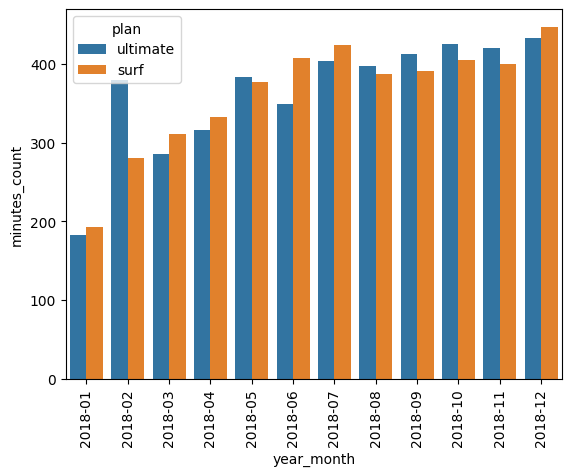

In [52]:
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.

sns.barplot(
    data=merged_df.sort_values('year_month'),
    x='year_month',
    y='minutes_count',
    hue='plan',
    ci=None
)

plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>
    
O seu codigo está correto, mas pode ser otimizado a transformação de números inteiros representando meses (por exemplo, 1 a 12) em nomes de meses como "Janeiro", "Fevereiro", etc., usando Pandas e o módulo **calendar**.

Exemplo
```python        
        import pandas as pd
        import calendar

        # Sample DataFrame with integer months
        df = pd.DataFrame({
            'month_number': [1, 3, 5, 7, 10, 12]
        })
        
        # Convert month numbers to month names
        df['month_name'] = df['month_number'].apply(lambda x: calendar.month_name[x])
        
        print(df)
```

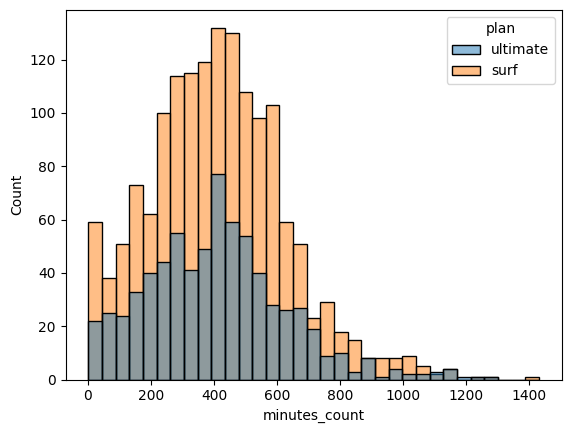

In [53]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.

sns.histplot(
    data=merged_df[merged_df['minutes_count'] > 0],
    x='minutes_count',
    hue='plan'
)

plt.show()

[Calcule a média e a variância da duração das chamadas para refletir se os usuários de cada plano possuem comportamentos diferentes sobre as chamadas.]

In [54]:
# Calcule a média e a variância da duração mensal das chamadas

merged_df.groupby(['plan', 'year_month'])['minutes_count'].agg({'mean', 'var', 'std'})

var         std        mean
plan     year_month                                      
surf     2018-01     14795.440200  121.636508  192.840000
         2018-02     46959.219961  216.700761  280.851111
         2018-03     31821.317991  178.385308  310.970000
         2018-04     45615.666796  213.578245  332.380000
         2018-05     53282.922217  230.830939  377.053247
         2018-06     40758.661193  201.887744  407.208866
         2018-07     54434.184064  233.311346  424.523223
         2018-08     48616.061790  220.490503  387.169630
         2018-09     41580.494645  203.912959  390.992062
         2018-10     46731.430317  216.174537  405.692363
         2018-11     46105.085924  214.720949  399.599823
         2018-12     56983.247423  238.711641  447.475283
ultimate 2018-01     14991.369958  122.439250  183.162500
         2018-02     68540.288348  261.802002  379.861429
         2018-03     54273.917252  232.967631  285.701667
         2018-04     31057.727496  176.232027  316.508095
         2018-05     39290.610940  198.218594  383.664828
         2018-06     37923.360514  194.739212  349.811064
         2018-07     64844.426958  254.645689  403.767288
         2018-08     47680.189425  218.357939  397.274789
         2018-09     50994.505514  225.819630  413.287326
         2018-10     48371.222127  219.934586  425.168019
         2018-11     54265.152604  232.948820  420.477559
         2018-12     55781.717507  236.181535  433.012583

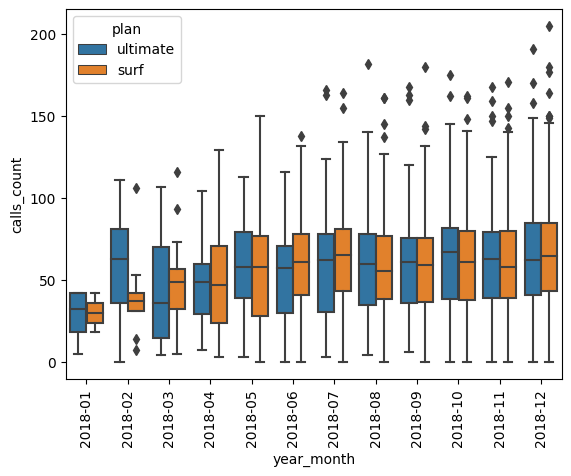

In [55]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

sns.boxplot(
    data=merged_df.sort_values('year_month'),
    x='year_month',
    y='calls_count',
    hue='plan'
)

plt.xticks(rotation=90)
plt.show()

[Formule conclusões sobre como os usuários se comportam em termos de chamadas. O comportamento é diferente dependendo do plano?]

Pelo que pudemos perceber no primeiro gráfico, a média de chamadas para cada plano é bem próxima, com exceção de fevereiro, onde o plano `ultimate` fica bem à frente do plano `surf`. Nos demais meses, o plano `surf` fica à frente, liderando em 6 dos outros 11 meses. 

No segundo gráfico, fica claro que há muito mais usuários que assinam o plano `surf` do que o plano `ultimate`. A média de minutos gastos por mês em ambos os planos fica em torno dos 400 minutos.

Com todas as informações que foram coletadas, pude concluir que, em média, o comportamento em ambos os planos é bem parecido, exceto no mês de fevereiro, onde o plano `ultimate` fica bem à frente.

### Mensagens

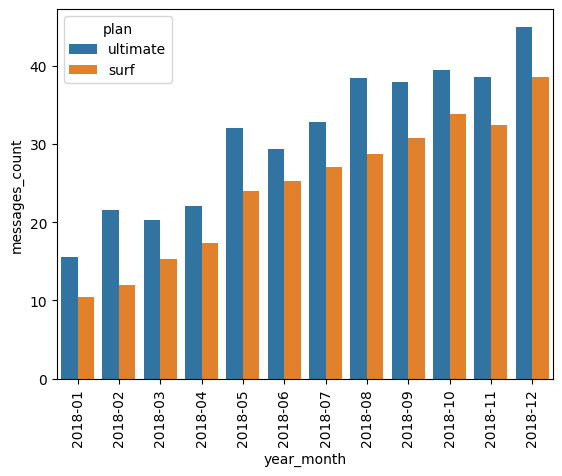

In [56]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês

sns.barplot(
    data=merged_df.sort_values('year_month'),
    x='year_month',
    y='messages_count',
    hue='plan',
    ci=None
)

plt.xticks(rotation=90)
plt.show()

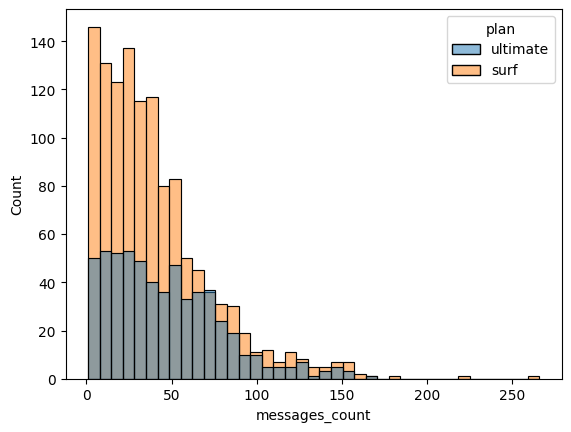

In [57]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

sns.histplot(
    data=merged_df[merged_df['messages_count'] > 0],
    x='messages_count',
    hue='plan'
)

plt.show()

In [58]:
merged_df.groupby(['plan', 'year_month'])['messages_count'].agg({'mean', 'var', 'std'})

var        std       mean
plan     year_month                                   
surf     2018-01      220.500000  14.849242  10.500000
         2018-02      386.000000  19.646883  12.000000
         2018-03      346.565217  18.616262  15.260870
         2018-04      501.591837  22.396246  17.400000
         2018-05      847.197198  29.106652  24.012987
         2018-06      914.920103  30.247646  25.298969
         2018-07      923.915565  30.395979  27.033058
         2018-08     1029.515528  32.086064  28.777778
         2018-09     1003.829496  31.683268  30.762887
         2018-10     1275.465708  35.713663  33.839662
         2018-11     1065.344034  32.639608  32.385159
         2018-12     1458.158612  38.185843  38.600629
ultimate 2018-01      313.666667  17.710637  15.500000
         2018-02      478.285714  21.869744  21.571429
         2018-03      654.386364  25.580977  20.250000
         2018-04      544.147619  23.326972  22.047619
         2018-05     1297.310345  36.018195  32.103448
         2018-06      857.620722  29.285162  29.340426
         2018-07      960.488019  30.991741  32.830508
         2018-08     1196.367404  34.588544  38.478873
         2018-09     1050.918331  32.417871  37.895349
         2018-10     1221.106289  34.944331  39.443396
         2018-11     1232.669166  35.109389  38.606299
         2018-12     1549.419956  39.362672  45.006623

[Formule conclusões sobre como os usuários costumam consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]

Conforme observado no primeiro gráfico, o volume médio de mensagens enviadas pelos usuários no plano `ultimate` é superior durante todo o ano.

Já no segundo gráfico, é possível observar que  quantidade de mansagens mensais para cada plano fica em torno de 0 a 28. Apesar de o plano `ultimate` ter um limite de 1000 mensagens mensais, a grande maioria não passa de 100 mensagens, enquanto no plano `surf`, como o limite é 50, podemos ver que a maioria fica atrás desse limite.

Com base nas informações coletadas, podemos assumir que o volume de mensagens não difere muito entre os planos, mesmo com o limite sendo 20x maior no plano `ultimate`. No plano `surf` os primeiros 4 meses ficam atrás em relação à média, que se mantém aproximadamente entre 35 e 40 mensagens durante os 8 meses restantes. Já no plano `ultimate`, assim como no plano surf, a média dos 4 primeiros meses ficam atrás, e nos outros 8 meses fica em torno de 30 a 45 mensagens.

### Internet

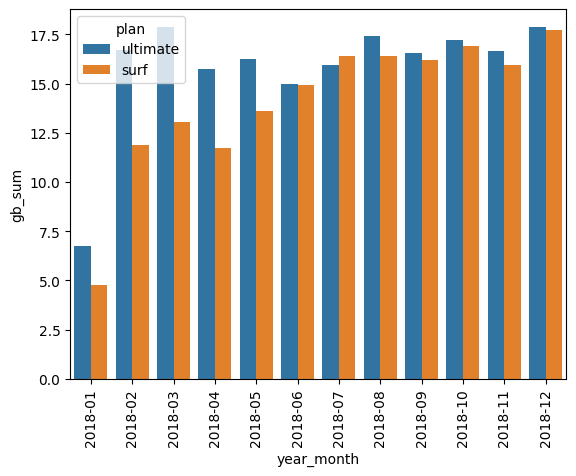

In [59]:
sns.barplot(
    data=merged_df.sort_values('year_month'),
    x='year_month',
    y='gb_sum',
    hue='plan',
    ci=None
)

plt.xticks(rotation=90)
plt.show()

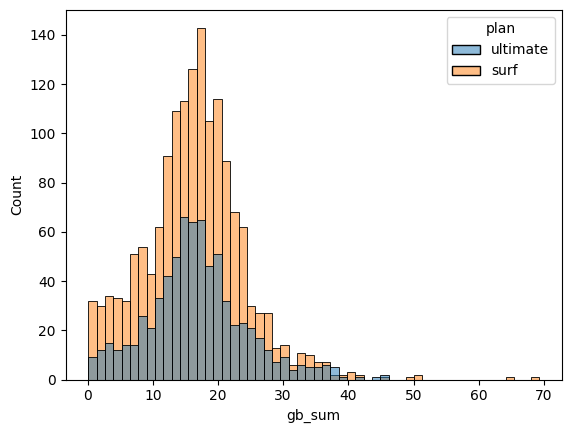

In [60]:
sns.histplot(
    data=merged_df[merged_df['gb_sum'] > 0],
    x='gb_sum',
    hue='plan'
)

plt.show()

In [61]:
merged_df.groupby(['plan', 'year_month'])['gb_sum'].agg({'mean', 'var', 'std'})

var        std       mean
plan     year_month                                  
surf     2018-01      17.394976   4.170728   4.760605
         2018-02      41.649779   6.453664  11.893402
         2018-03      65.084035   8.067468  13.032656
         2018-04      56.309643   7.503975  11.703323
         2018-05      58.628592   7.656931  13.609722
         2018-06      46.857252   6.845236  14.942900
         2018-07      61.689899   7.854292  16.390235
         2018-08      71.178902   8.436759  16.401691
         2018-09      48.939371   6.995668  16.202570
         2018-10      59.631291   7.722130  16.905601
         2018-11      54.526776   7.384225  15.956303
         2018-12      68.805130   8.294886  17.707490
ultimate 2018-01      15.635216   3.954139   6.755950
         2018-02      35.904976   5.992076  16.727352
         2018-03     133.837858  11.568831  17.892108
         2018-04      84.332091   9.183251  15.743803
         2018-05      54.159275   7.359299  16.234846
         2018-06      68.678409   8.287244  14.978439
         2018-07      65.249644   8.077725  15.961664
         2018-08      57.646831   7.592551  17.397188
         2018-09      47.053374   6.859546  16.572138
         2018-10      54.354932   7.372580  17.199759
         2018-11      54.921606   7.410911  16.634458
         2018-12      59.014608   7.682097  17.893742

[Formule conclusões sobre como os usuários tendem a consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]

No primeiro gráfico, é possível ver que o plano `ultimate` fica à frente em tráfego de internet em todos os meses, exceto por julho, onde o plano `surf` fica à frente por muito pouco. O comportamento difere bem nos primeiros 5 meses, com o plano `ultimate` ficando bem à frente, o que muda nos outros meses, onde a margem de diferença das médias de tráfego de internet por mês se aproximam entre os dois planos.

No segundo gráfico, vemos que, no geral, o gasto de internet é bem similar, mas em média os usuários do plano `surf` gastam mais internet, com sua média mais próximo de 17gb gastos, o que é um número interessante, já que o limite mensal é 15gb para o plano `surf`. Isso nos mostra que os usuários costumam passar do limite de tráfego de internet nesse plano. Já no plano `ultimate`, a média fica em torno de 14, 15gb. Isso nos diz que, mesmo que o plano `ultimate` tenha o dobro de tráfego disponível mensalmente, os usuários gastam menos no que no plano `surf`.

## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

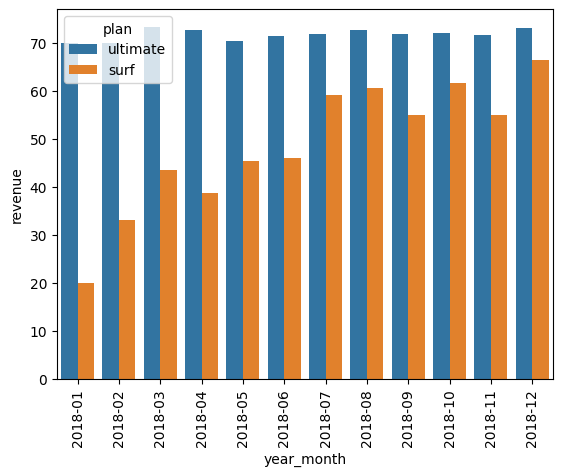

In [62]:
sns.barplot(
    data=merged_df.sort_values('year_month'),
    x='year_month',
    y='revenue',
    hue='plan',
    ci=None
)

plt.xticks(rotation=90)
plt.show()

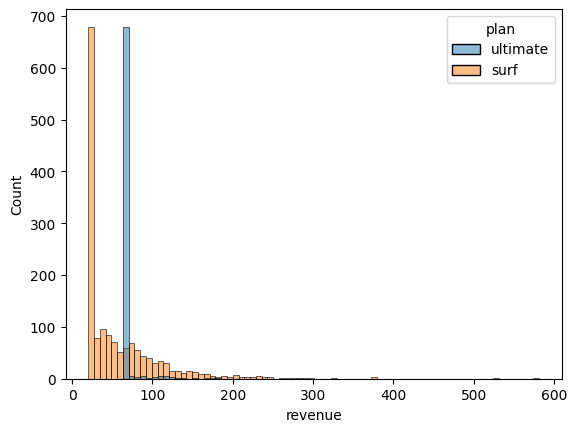

In [63]:
sns.histplot(
    data=merged_df[merged_df['revenue'] > 0],
    x='revenue',
    hue='plan'
)

plt.show()

In [64]:
revenue_stats = merged_df.groupby(['plan', 'year_month'])['revenue'].agg({'mean', 'var', 'std'})
revenue_stats

var        std       mean
plan     year_month                                   
surf     2018-01        0.000000   0.000000  20.000000
         2018-02      373.848278  19.335157  33.003956
         2018-03     1398.510062  37.396658  43.578788
         2018-04     1091.750583  33.041649  38.777485
         2018-05     1800.862961  42.436576  45.346471
         2018-06     1823.758558  42.705486  45.920653
         2018-07     2780.794131  52.733236  59.171272
         2018-08     3422.047181  58.498266  60.650127
         2018-09     2096.562909  45.788240  54.923685
         2018-10     2984.756428  54.632924  61.646473
         2018-11     2330.530450  48.275568  54.932077
         2018-12     4417.907220  66.467339  66.360652
ultimate 2018-01        0.000000   0.000000  70.000000
         2018-02        0.000000   0.000000  70.000000
         2018-03      109.470151  10.462798  73.392448
         2018-04      112.851784  10.623172  72.771377
         2018-05        7.713035   2.777235  70.515720
         2018-06       59.193076   7.693704  71.476980
         2018-07       99.291160   9.964495  71.850414
         2018-08      136.945993  11.702393  72.680102
         2018-09       61.174210   7.821394  71.812310
         2018-10      151.655768  12.314860  72.091689
         2018-11       85.865043   9.266339  71.601204
         2018-12      195.486819  13.981660  73.045714

[Formule conclusões sobre como a receita difere entre os planos.]

No primeiro gráfico podemos observar que, devido à diferença de preço entre os planos (20 dólares para o plano `surf` e 70 dólares para o plano `ultimate`, então uma diferença de 50 dólares), o plano `ultimate` gera mais receita para a empresa, mesmo com bem menos usuários assinando esse plano.

Já no segundo gráfico, é possível ver que os usuários do plano `surf` ultrapassam bem mais o limite mensal, o que era de se esperar, já que o plano `ultimate` fornece bem mais benefícios.

Observando as médias, podemos concluir que os usuários do plano `surf` ultrapassam o limite mensal regularmente, o que se justifica pelo fato das médias mensais da receita dos usuários desse plano estarem todas acima de 30. Já a média da receita dos usuários do plano `ultimate` permanecem por volta dos 70 a 73, o que era de se esperar devido aos benefícios que são providos por esse plano.

## Teste hipóteses estatísticas

[Teste a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

Aqui a hipótese nula é de que a receita média dos usuários dos planos `surf` e `ultimate` são iguais. Nossa hipótese alternativa é de que a receita média dos usuários dos planos `surf` e `ultimate` diferem. Vamos usar um valor alfa (limiar) de 5%:

In [65]:
# Teste as hipóteses

sample_1 = merged_df[merged_df['plan'] == 'ultimate']['revenue']
sample_2 = merged_df[merged_df['plan'] == 'surf']['revenue']

In [66]:
sample_1.var(), sample_2.var()

(115.96808058212822, 2887.54497103938)

In [67]:
alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula.')
else:
    print('Não podemos rejeitar a hipótese nula.')

valor-p:  4.881852673479799e-25
Rejeitamos a hipótese nula.


Baseado no teste de hipótese que acabamos de fazer, podemos afirmar que rejeitamos a hipótese nula, o que nos diz que é muito improvável que as receitas médias dos planos `surf` e `ultimate` sejam iguais. Provavelmente há uma diferença real entre elas.

[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

Aqui a hipótese nula é de que a receita média dos usuários da área de NY-NJ é igual à dos usuários das demais regiões. Nossa hipótese alternativa é de que a receita média dos usuários da área de NY-NJ e dos usuários das demais regiões diferem. Vamos usar um valor alfa (limiar) de 5%:

In [68]:
# Teste as hipóteses

merged_df['is_nynj'] = merged_df['city'].str.contains('NY-NJ')

In [69]:
sample_1 = merged_df[merged_df['is_nynj'] == True]['revenue']
sample_2 = merged_df[merged_df['is_nynj'] == False]['revenue']

In [70]:
sample_1.var(), sample_2.var()

(1777.7529232966267, 2116.1719888966627)

In [71]:
alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula.')
else:
    print('Não podemos rejeitar a hipótese nula.')

valor-p:  0.01860947297497194
Rejeitamos a hipótese nula.


<div class="alert alert-block alert-success">
  <b>Comentário:</b> <a class="tocSkip"></a>

  Os dois testes foram implementados corretamente. Parabéns pelo trabalho!

</div>

Fizemos o teste de hipótese e, baseado nele, podemos afirmar que rejeitamos a hipótese nula. Isso significa que provavelmente a média das receitas dos usuários da área de NY-NJ difere das demais.

## Conclusão geral

[Liste suas conclusões importantes nesta seção final, certifique-se de que elas cobrem todas as decisões (suposições) importantes que você tomou e que levaram à maneira como você processou e analisou os dados.]

Esse projeto foi bem interessante. A análise dos dados dos planos `surf` e `ultimate` da Megaline revelou diferenças relevantes no comportamento dos usuários e na geração de receita.

Em termos de chamadas e mensagens, o uso médio mensal foi semelhante entre os planos, com variações pontuais. O plano `ultimate` apresentou maior envio de mensagens ao longo do ano, mas poucos usuários chegaram perto dos limites disponíveis em qualquer um dos planos.

No tráfego de internet, os usuários do plano `surf` frequentemente ultrapassam a franquia de 15 GB, com média mensal próxima de 17 GB. Já os usuários do `ultimate`, que possuem 30 GB disponíveis, consomem em média 14 a 15 GB, o que indica menos cobrança por excedente.

Apesar de o `ultimate` ter menos usuários, sua alta mensalidade garante uma receita média maior. Por outro lado, o `surf`, com muito mais usuários, gera receita extra principalmente pelo uso de dados acima do limite.

O teste de hipótese confirmou que a diferença entre as receitas médias dos dois planos é estatisticamente significativa. Isso indica que a escolha do plano impacta diretamente na receita gerada, e que o `ultimate` gera mais receita por usuário, enquanto o `surf` compensa em volume de assinantes e uso excedente.

Com base nas análises e testes realizados, podemos concluir que o plano `ultimate` gera mais receita por usuário, principalmente devido ao valor da assinatura. No entanto, o plano `surf` apresenta maior volume de usuários e frequentemente gera receita adicional por excedente, especialmente no uso de dados. Ambos os planos têm comportamentos parecidos no uso de chamadas e mensagens, mas o consumo de internet e a estratégia de precificação são os principais fatores de diferenciação em termos de receita.

<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Conclusão adicionada com sucesso